#  Case study on Unsupervised Learning

   Do the following in the wine dataset.

   1. Read the dataset to the python environment.
   2. Try out different clustering models in the wine dataset.
   3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.



### Importing all the libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for scaling
import sklearn
from sklearn.preprocessing import StandardScaler

#for K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#for Hierarchical
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


## 1.Read the dataset to the python environment.

In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\BONNY JOHNSON\Downloads\Wine.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Understanding Data 

In [3]:
print('Shape --->', data.shape)
print(data.info())

Shape ---> (178, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


### Out of 178, all are no-null. So we don't need to do any missing value imputation

In [4]:
#list of columns
cols = list(data)
print(cols)

['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']


In [5]:
data.describe(include = 'all')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


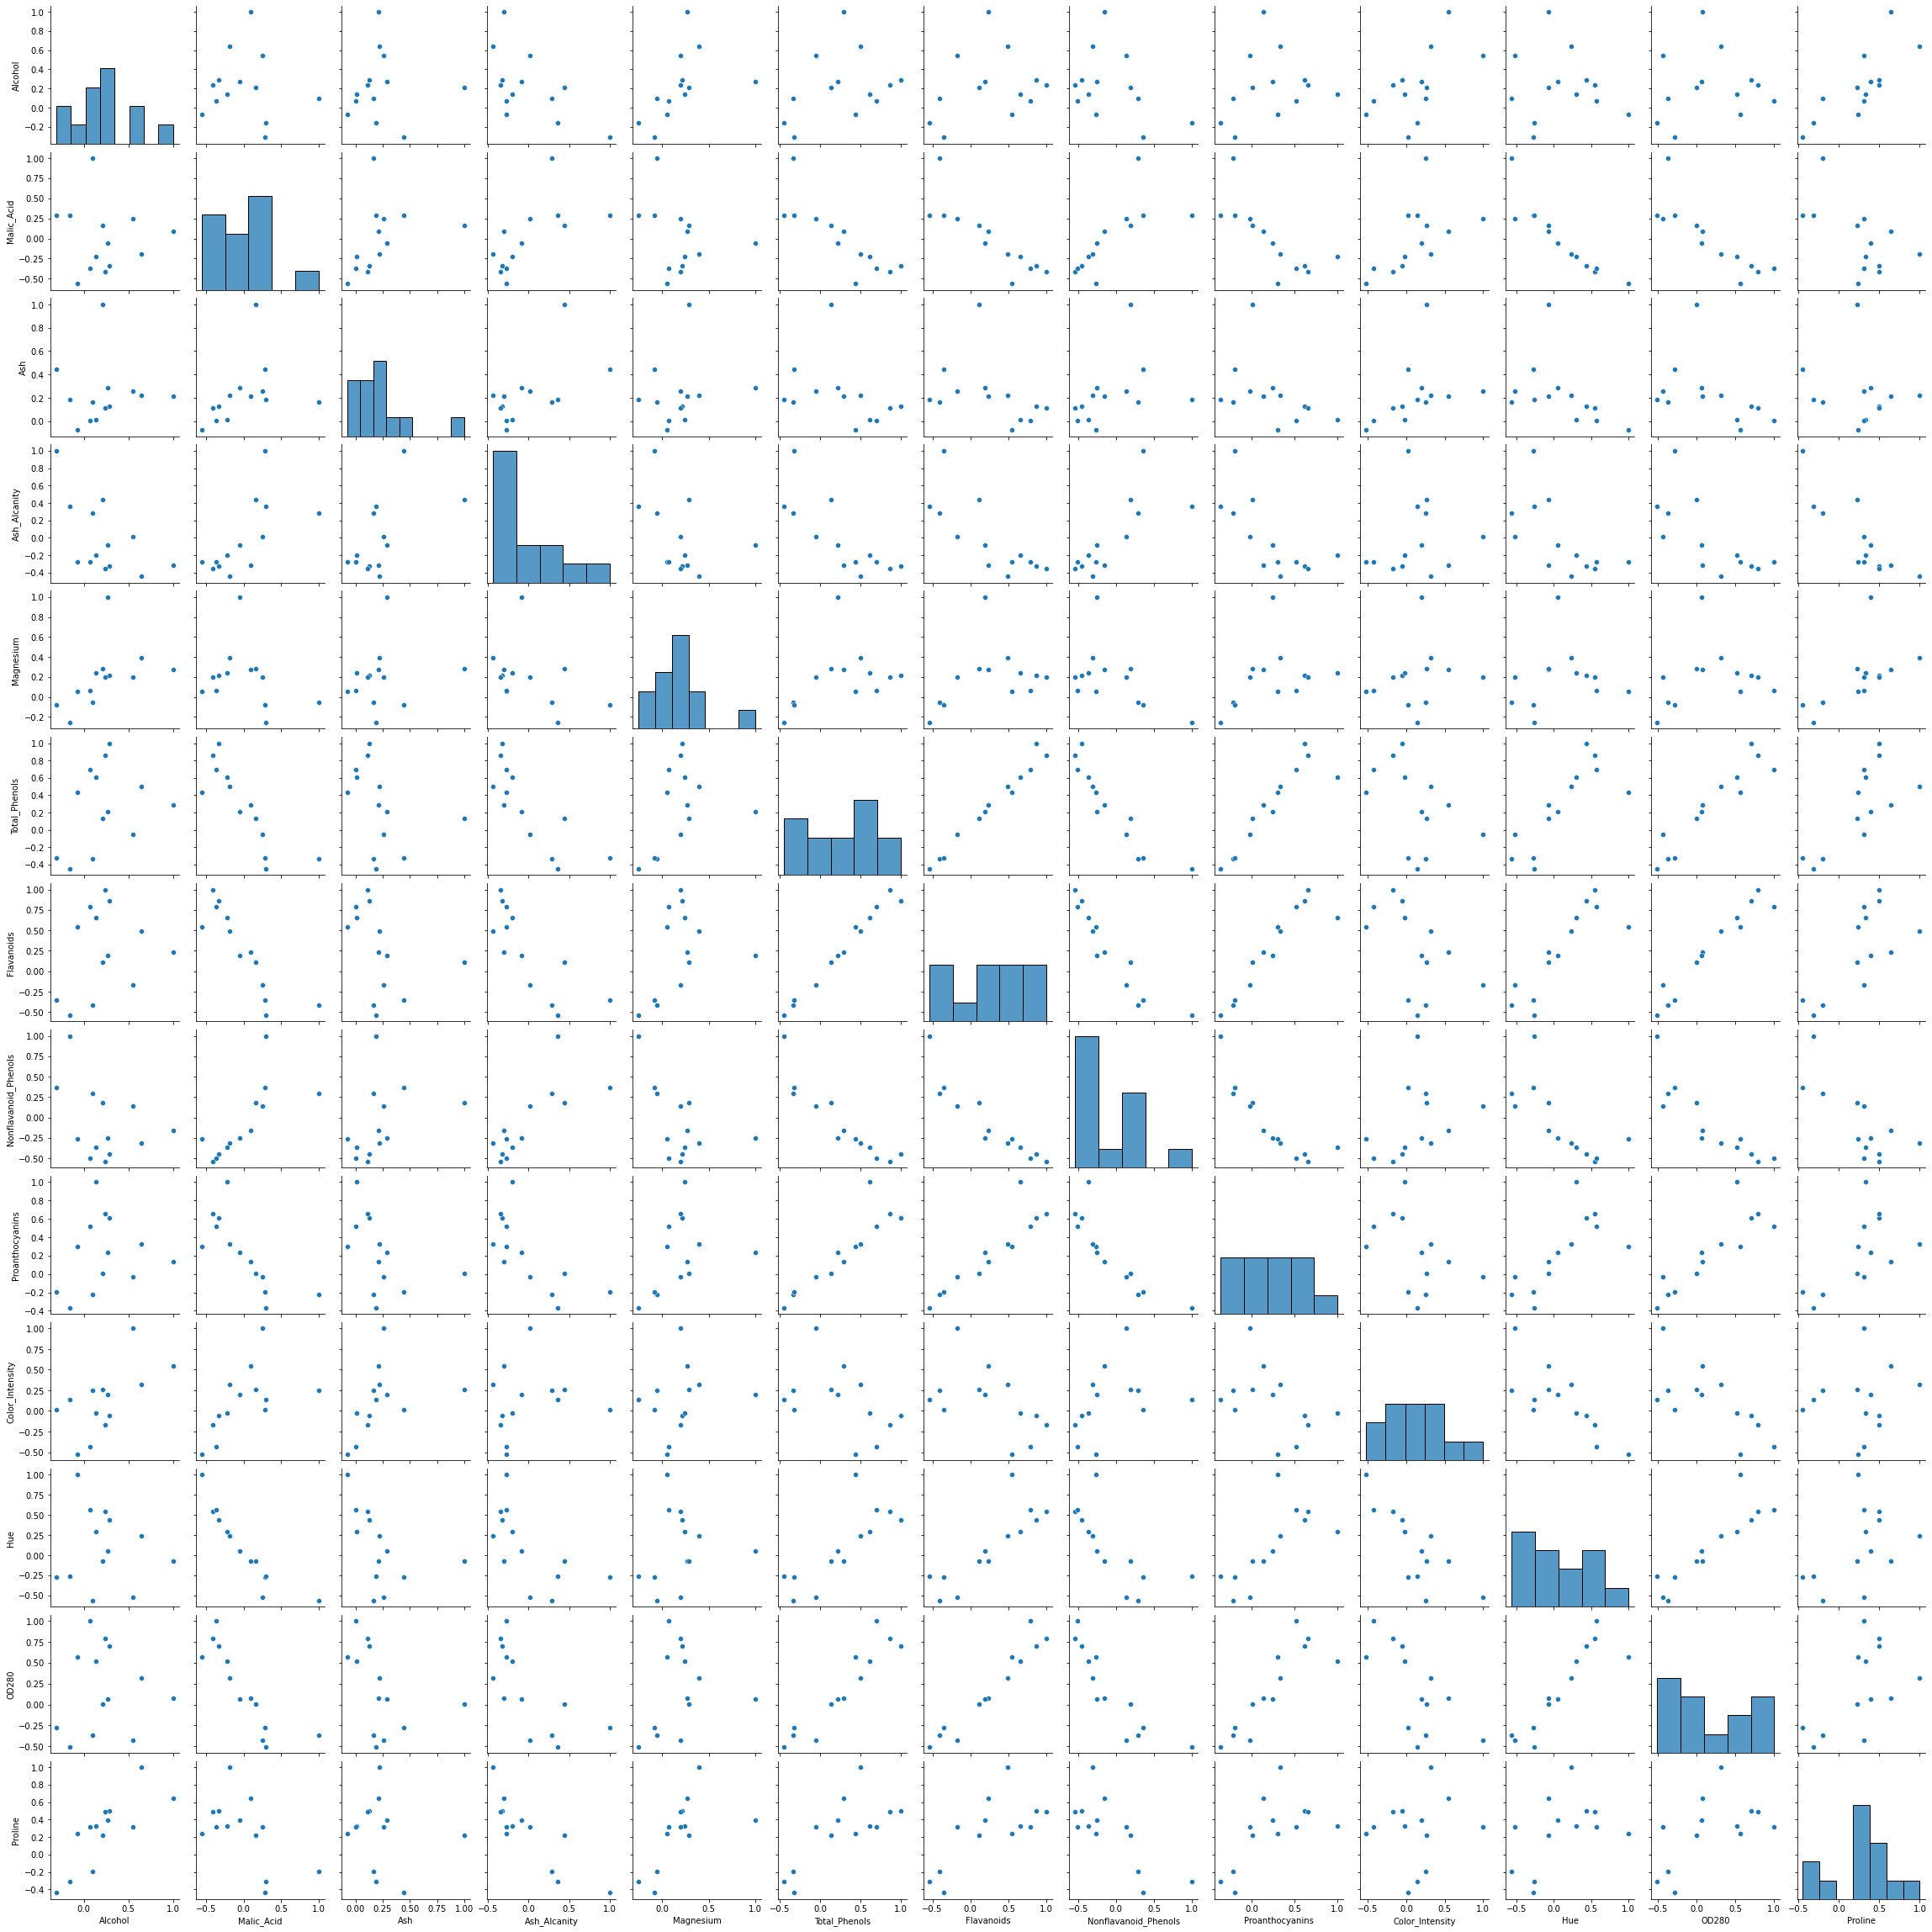

In [6]:
sns.pairplot(data.corr())

<AxesSubplot:>

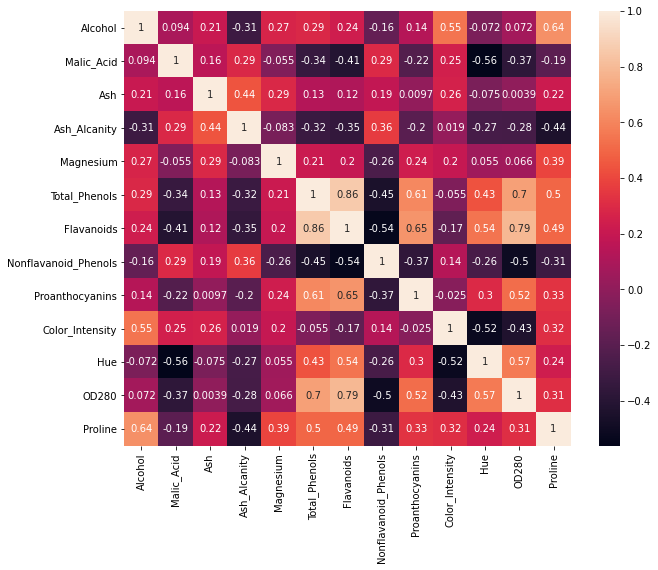

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True)

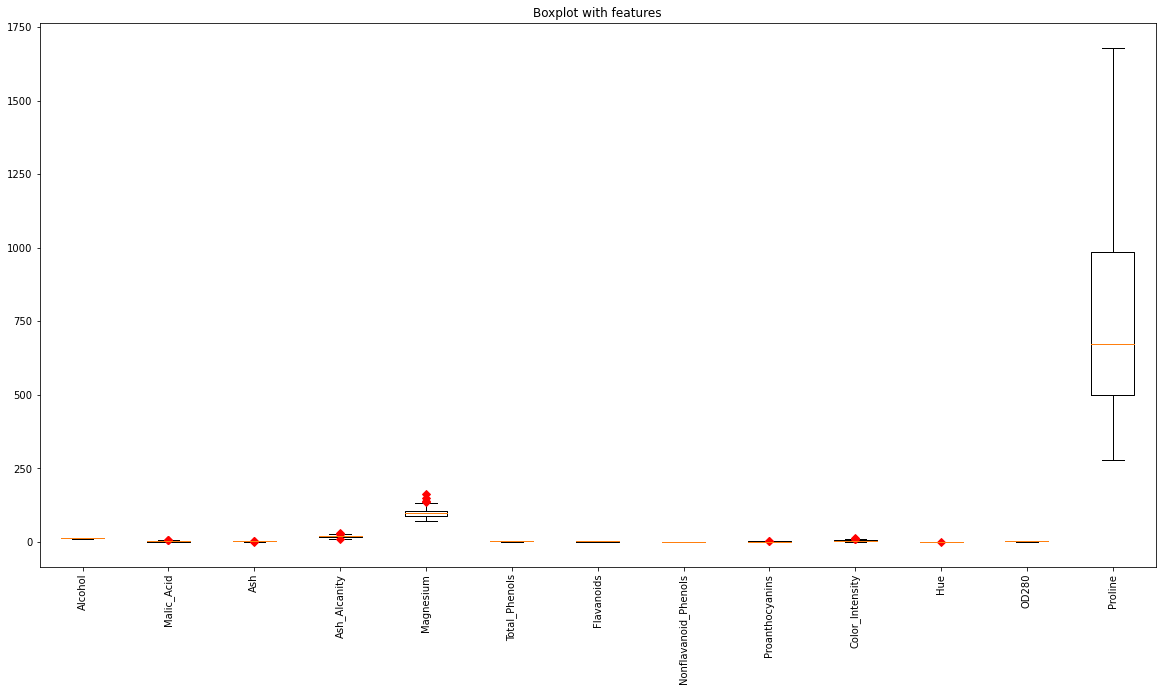

In [8]:
ls_features = list(data.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(data.values, 0, 'rD', labels = ls_features)
plt.xticks(rotation = 90)

plt.show()

In [9]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data)

## 1. KMeans Clustering

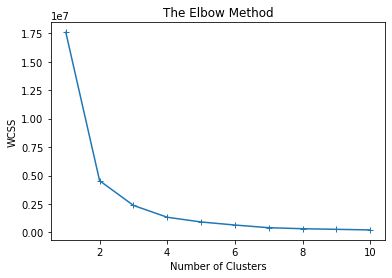

In [10]:
wcss = []
for i in range(1,11):
    model = KMeans(init='k-means++', n_clusters=i)
    model.fit(data)
    y_pred = model.fit_predict(data)
    wcss.append(model.inertia_)

plt.plot(range(1,11),wcss,'+-')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

* Here K can be chosen as 3

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data)
type(data)
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

### Checking the efficency of the model using evaluation metrics

In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data,y_kmeans)
print(silhouette_avg)

0.571138193786884


 * We can try to improve the model by standardisation and feature reduction

In [45]:
# Standardizing
from sklearn.preprocessing import StandardScaler
standardisation=StandardScaler()
data1=standardisation.fit_transform(data)

features=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
           'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

data1=pd.DataFrame(data1)
data1.columns = features
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [21]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [22]:
#Using Elbow method to find the optimal value of k.
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

2313.9999999999986
1659.0079672511504
1277.928488844643
1175.7051928197127
1104.861683962532
1042.3872037251417
988.0533283180057
940.708165089653
902.0783170433883
866.7991687164842


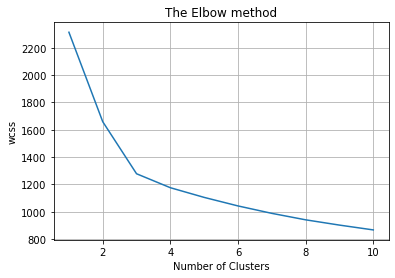

In [23]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')  
plt.grid();

* Here again the elbow lies in between 2 and 4 so let us consider k as 3.

In [24]:
kmeans=KMeans(n_clusters = 3,init='k-means++',random_state=42)
y_kmeans1=kmeans.fit_predict(data1) 
                               
type(data1)
y_kmeans1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
#Checking the efficency of the model using evaluation metrics
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data1,y_kmeans1)
print(silhouette_avg)

0.28485891918989864


* Here the value is obtained as 0.284 which less than the corresponding value of original data 

### Applying Principal component Analysis for feature reduction

In [26]:
# Applying Principal component Analysis for feature reduction

from sklearn.decomposition import PCA
pca =PCA(n_components = 0.97)
pca.fit(data1)
data1_pca = pca.transform(data1)
data1_pca.shape

(178, 11)

*The data reduced the number of features from 13 to 11 .Now let's check our model to this data.

In [27]:
#Applying the model

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data1_pca)
    wcss.append(kmeans.inertia_)
           

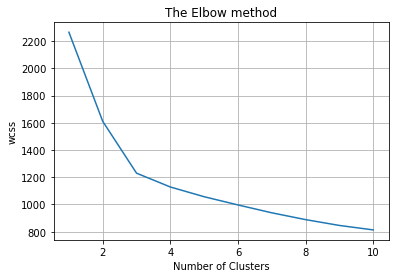

In [28]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')  
plt.grid()

* Let us consider the optimal no. of cluster as 3

In [29]:
kmeans=KMeans(n_clusters = 3,init='k-means++',random_state=42)
y_kmeans1=kmeans.fit_predict(data1_pca) 
                               
type(data1_pca)
y_kmeans1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [30]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data1_pca,y_kmeans1)
print(silhouette_avg)

0.2919562248268693


## Inference
* Here after standardisation and feature reduction the model efficiency has decreased. So its not advisable
* Here KMeans method for the all the features with K=3 gave the most efficient model with efficiency score 0.57.

## 2.Hierarchial Clustering

### Using dendrogram to find the number of clusters

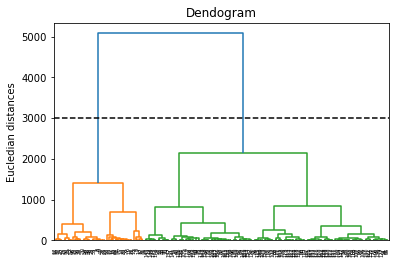

In [62]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.hlines(3000,0,5000,colors='black',linestyle='dashed')
plt.title('Dendogram')
plt.ylabel('Eucledian distances')
plt.show()

* Here K can be chosen as 2

### Fitting Agglomerative Clustering model

In [63]:
#Fitting Agglomerative Clustering model

from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_HC=cluster.fit_predict(data)
labels_HC

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [65]:
#Evaluating the model

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data,labels_HC)
print(silhouette_avg)

0.6587237543461161


* The silhouette average is obtained as 0.658. So let's try to improve the model by applying Agglomerativr HC on normalized data and again check it's evaluation matrics.

In [34]:
#Normalization of data

from sklearn.preprocessing import Normalizer
norm=Normalizer()
data2=norm.fit_transform(data)

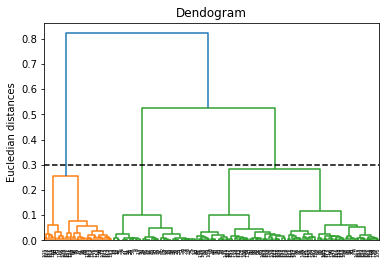

In [35]:
#using the dendogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(data2,method='ward'))
plt.title('Dendrogram')
plt.hlines(0.3,0,5000,colors='black',linestyle='dashed')
plt.title('Dendogram')
plt.ylabel('Eucledian distances')
plt.show()

* Here we can consider k as 3

In [36]:
# Fitting the Model
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels_HC1=cluster.fit_predict(data2)
labels_HC1

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [37]:
#Evaluating the model
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data2,labels_HC1)
print(silhouette_avg)

0.5035575391761334


* The value increased to 0.5035 which is better than the first HC model with the original data.Now we can check whether there will be any increase in the efficiency if this applied to the feature reduced data.

In [48]:
#Applying Principal component Analysis for feature reduction in normalized data

pca =PCA(n_components = 0.97)
pca.fit(data2)
data2_pca = pca.transform(data2)
data2_pca.shape

(178, 1)

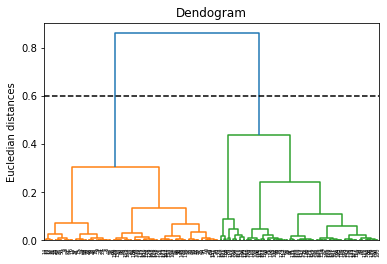

In [50]:
dendogram = sch.dendrogram(sch.linkage(data2_pca, method='ward'))
plt.hlines(0.6,0,5000,colors='black',linestyle='dashed')
plt.title('Dendogram')
plt.ylabel('Eucledian distances')
plt.show()

* We can consider the number of cluster as 2.

In [51]:
# Fitting the Model
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_HC2=cluster.fit_predict(data2)
labels_HC2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [52]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data1,labels_HC2)
print(silhouette_avg)

0.06463062129992132


* Here we get very low efficiency

In [53]:
#Applying Principal component Analysis for feature reduction in normalized data

pca =PCA(n_components = 0.97)
pca.fit(data1)
data1_pca = pca.transform(data1)
data1_pca.shape

(178, 11)

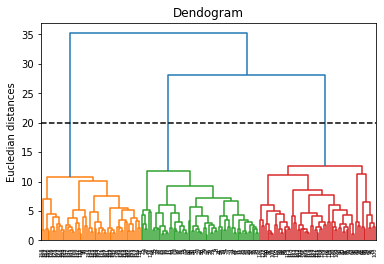

In [54]:
dendogram = sch.dendrogram(sch.linkage(data1_pca, method='ward'))
plt.hlines(20,0,5000,colors='black',linestyle='dashed')
plt.title('Dendogram')
plt.ylabel('Eucledian distances')
plt.show()

* We can consider the number of cluster as 3.

In [55]:
# Fitting the Model
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels_HC3=cluster.fit_predict(data1)
labels_HC3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [56]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data1,labels_HC3)
print(silhouette_avg)

0.2774439826952266



## Inference
* Here HC method for the all the features with K=2 gave the most efficient model with efficiency score 0.66.
* Standard scaling and feature reduction decreased the efficiency of the model very much so its not advisable in this perticular data set
* The effeciency we obtained by using normalized data is 0.5035 and when applied it to the PCA applied data the efficiency reduced.

## Now we can compare two models with a sample.

In [72]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'cluster_3'],
      dtype='object')

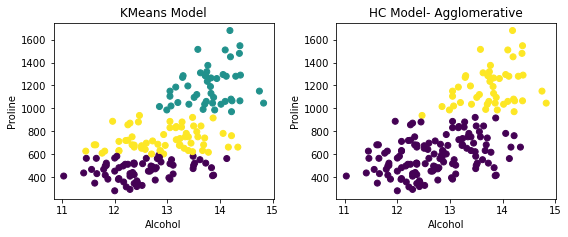

In [73]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
A=data['Alcohol']
P=data['Proline']
plt.scatter(A,P,c=y_kmeans)
plt.title('KMeans Model')
plt.xlabel('Alcohol')
plt.ylabel('Proline')

plt.subplot(2,2,2)
A=data['Alcohol']
P=data['Proline']
plt.scatter(A,P,c=labels_HC)
plt.title('HC Model- Agglomerative')
plt.xlabel('Alcohol')
plt.ylabel('Proline')

plt.tight_layout()

## Insight
* In both the modelling the clusters are grouped without overlapping
* KMeans model gives 3 clusters with model efficiency 0.57. i.e, Wine quality can be divided to three groups.
* HC model gives 2 clusters with model efficiency 0.66. i.e, Wine quality can be divided to two groups.

## Conclusion

##  3 Group Clustering By KMeans Model

In [76]:
#recalling the data that is generated earlier
# added a column to the dataset 
data['Quality'] = y_kmeans

data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_3,Quality
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2


## 2 Group Clustering By HC Model

In [77]:
#recalling the data that is generated earlier
# added a column to the  dataset 
data['Quality'] = labels_HC

data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_3,Quality
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0


## Which grouping is acceptable can be decided by the client as per their requirement